**Работу выполнил Трофимов Михаил, ПМ22-1**

In [1]:
# Импортируем необходимые библиотеки и функции
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (StratifiedKFold, cross_val_score)
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from random import randint

# Методические указания

**Цель работы**

Познакомиться с основными задачами и приемами предварительного анализа и обработки данных для целей машинного обучения

Предварительная обработка данных является неотъемлемым этапом машинного обучения, поскольку качество данных и полезная информация, которую можно извлечь из них, напрямую влияют на способность нашей модели к обучению; поэтому чрезвычайно важно, чтобы мы предварительно обработали наши данные, прежде чем вводить их в нашу модель.

**Содержание работы**

1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.
2. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.
3. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.
4. Исследуйте и исправьте при необходимости пропущенные значения в датасете.
5. Преобразуйте категориальные признаки в численные самым подходящим способом.

**Подготовка и загрузка данных**

In [2]:
# считываем данные из csv файла
training_set = pd.read_csv('titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
training_set.describe() # статистика по числовым переменным

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
training_set.describe(include=['O']) # статистика по категориальным переменным

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Описание каждого признака**

In [5]:
# функция гистограммы по признакам
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, int(training_set.max()) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

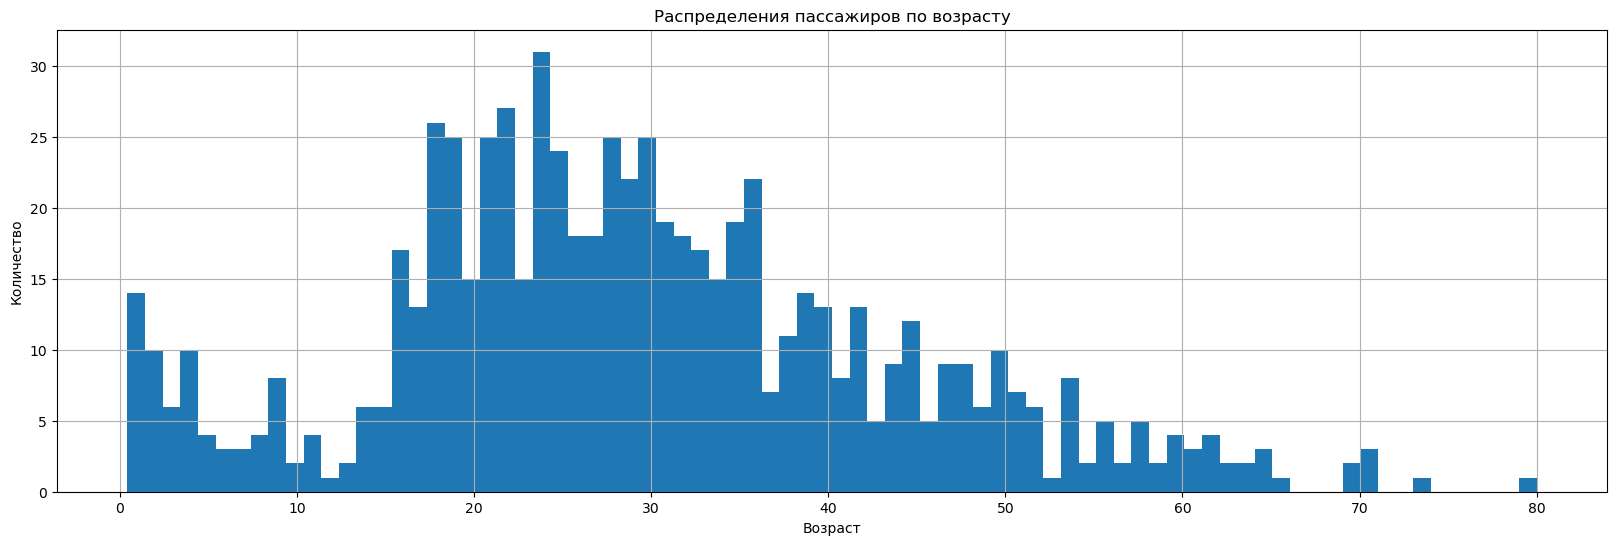

In [6]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

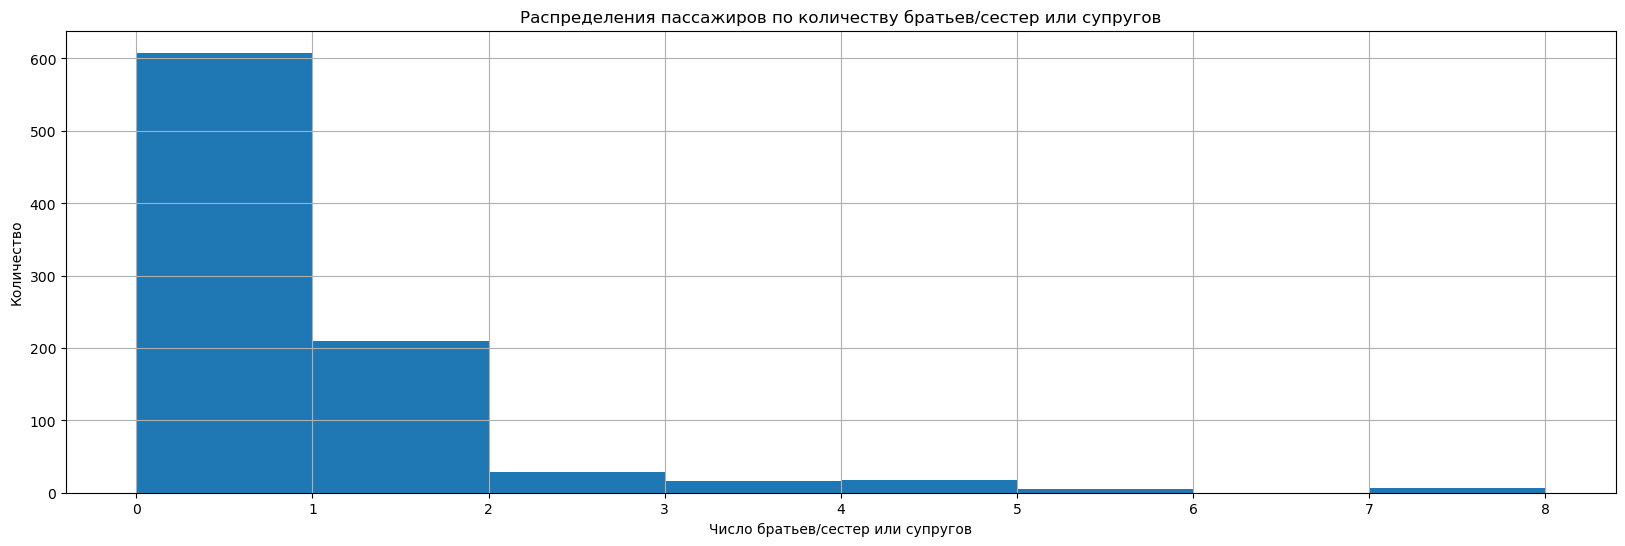

In [7]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 
  'Число братьев/сестер или супругов')

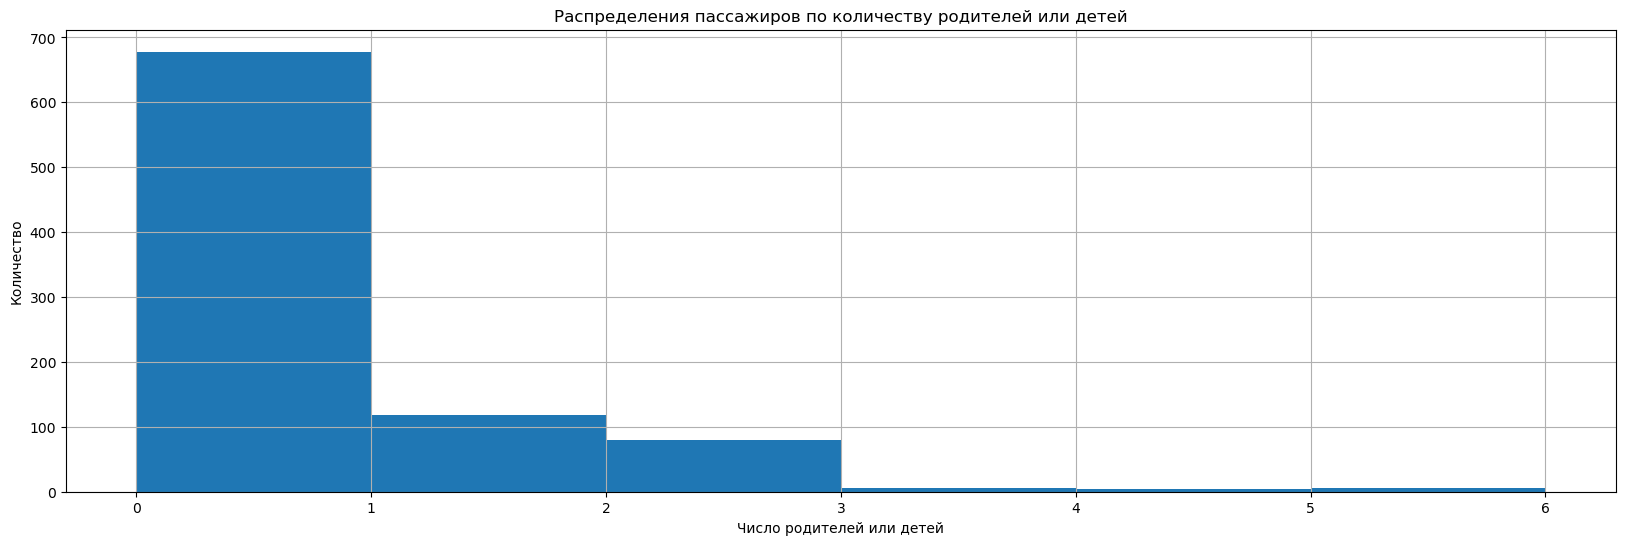

In [8]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 
  'Число родителей или детей')

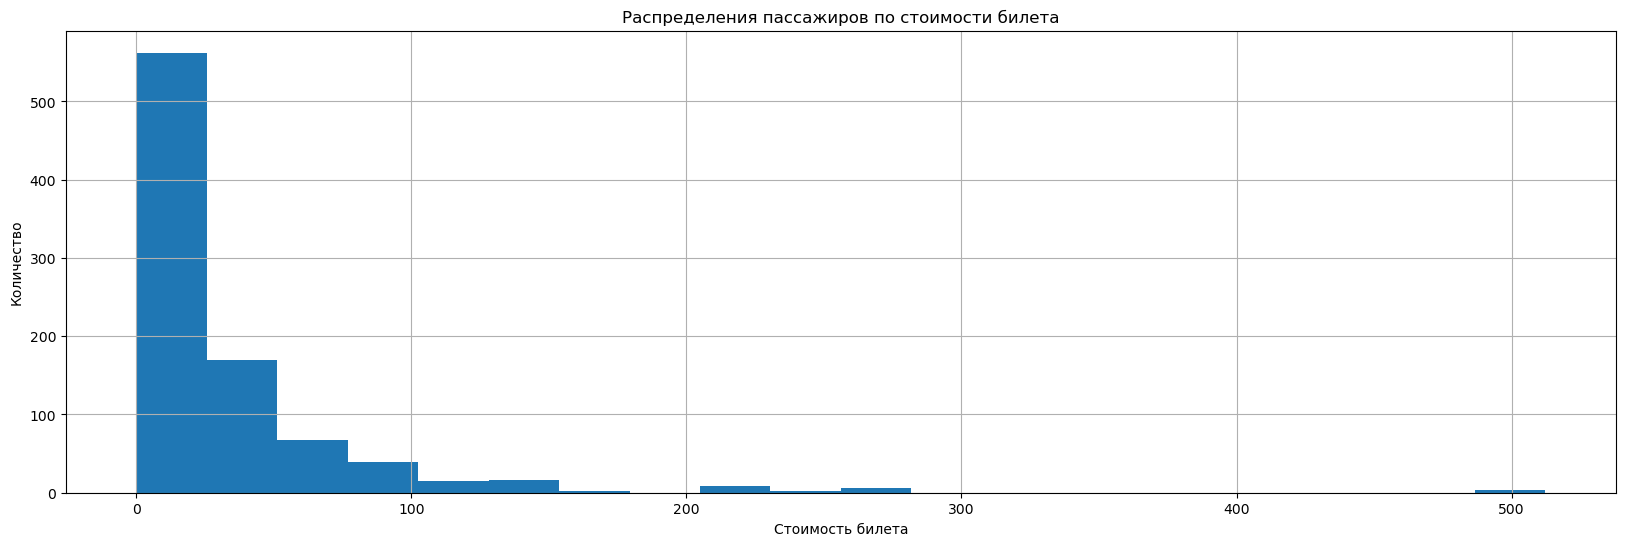

In [9]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 
  'Стоимость билета', bins=20)

<AxesSubplot:ylabel='Frequency'>

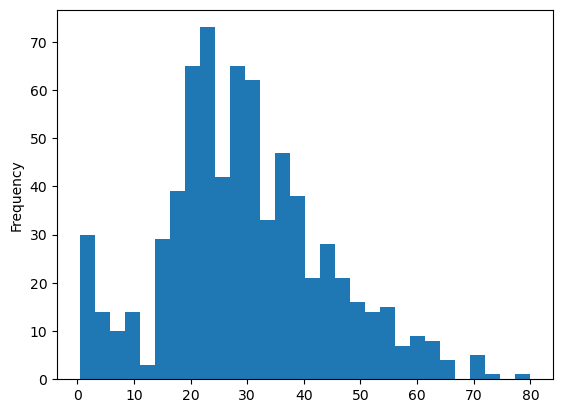

In [10]:
training_set['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

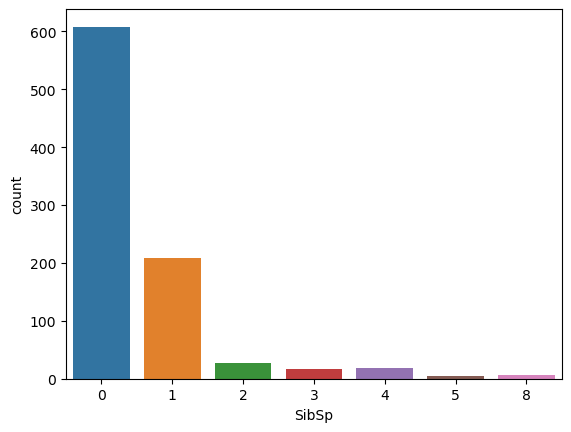

In [11]:
sns.countplot(x='SibSp', data=training_set)

<AxesSubplot:>

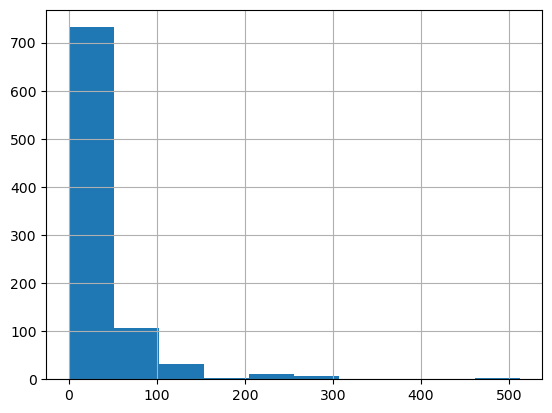

In [12]:
training_set['Fare'].hist()

<AxesSubplot:>

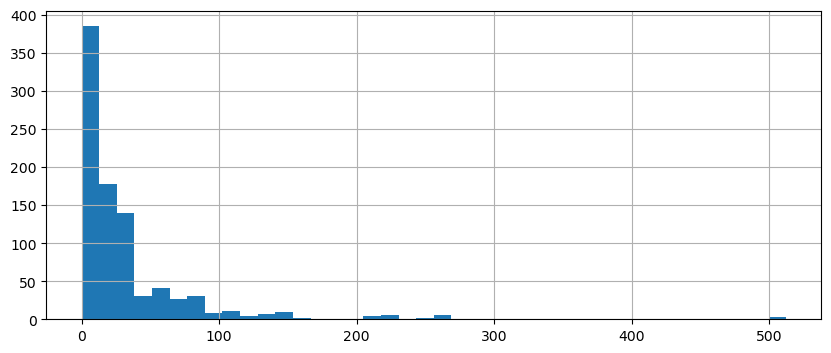

In [13]:
training_set['Fare'].hist(bins=40, figsize=(10,4))

**Описание вида совместного распределения**

<AxesSubplot:xlabel='Survived', ylabel='count'>

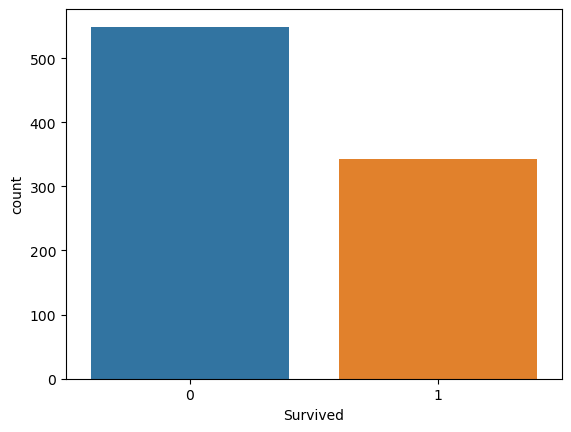

In [14]:
# Установим соотношение выживших и не выживших
sns.countplot(x='Survived', data=training_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

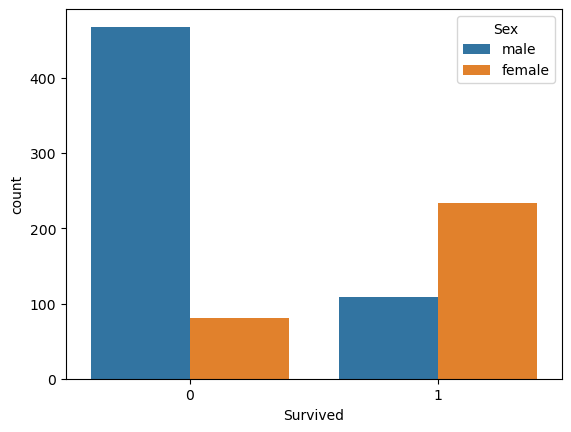

In [15]:
# Отобразим пол выживших и не выживших
sns.countplot(x='Survived', data=training_set, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

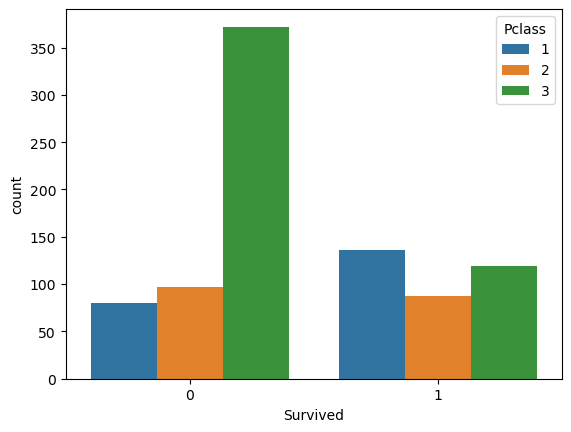

In [16]:
# соотношение класса и количества выживших
sns.countplot(x='Survived', data=training_set, hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

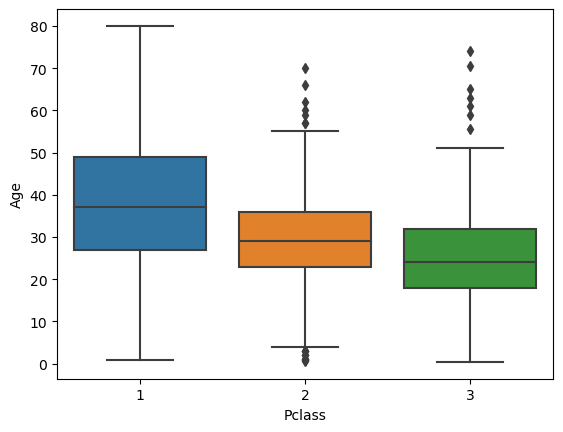

In [17]:
# возраст пассажиров по классам
sns.boxplot(x='Pclass', y='Age', data=training_set)

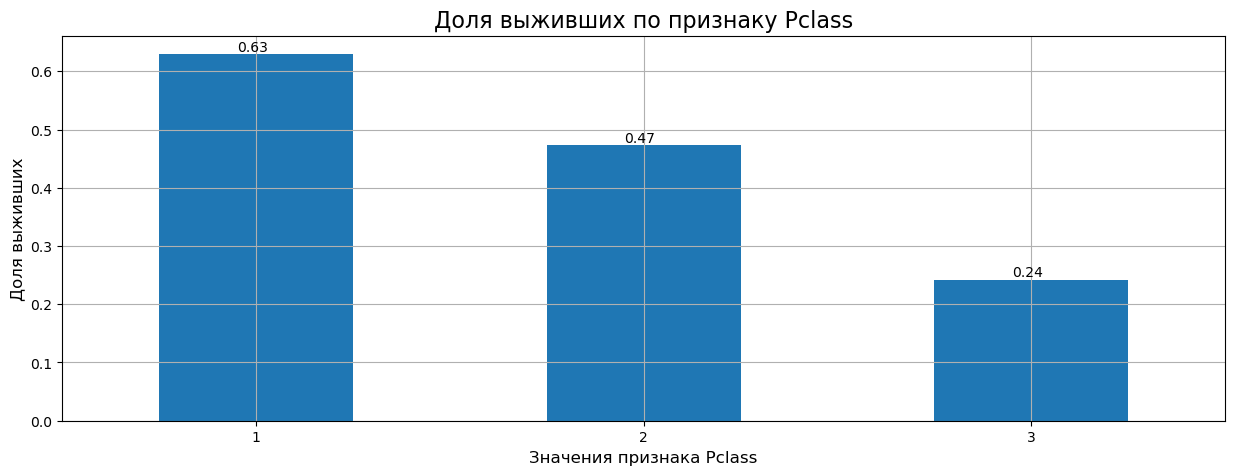

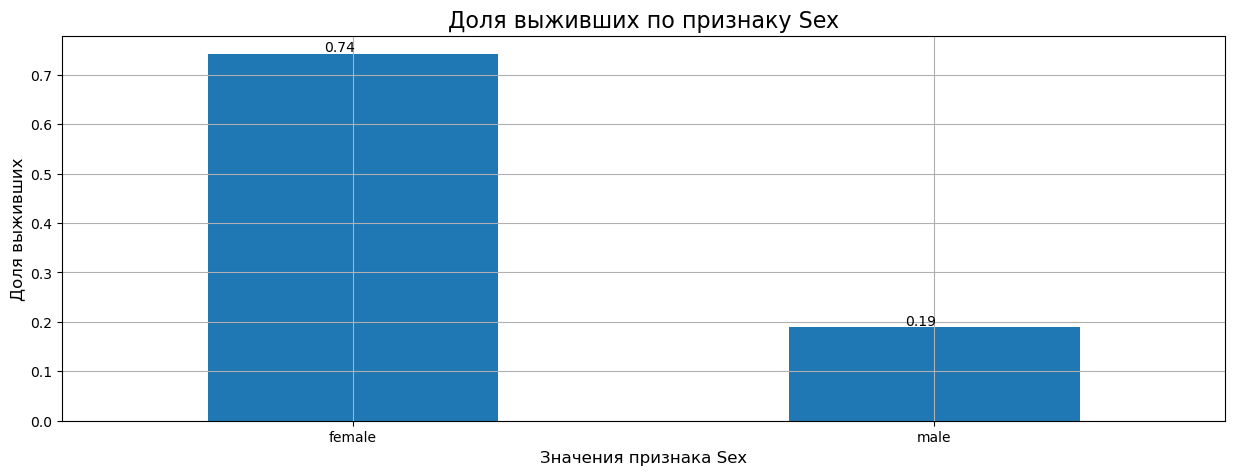

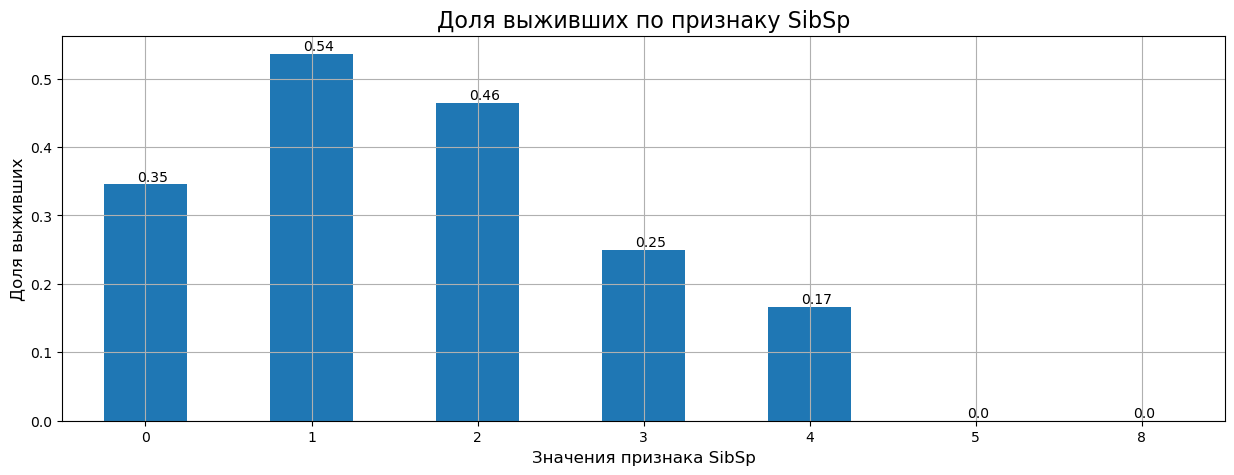

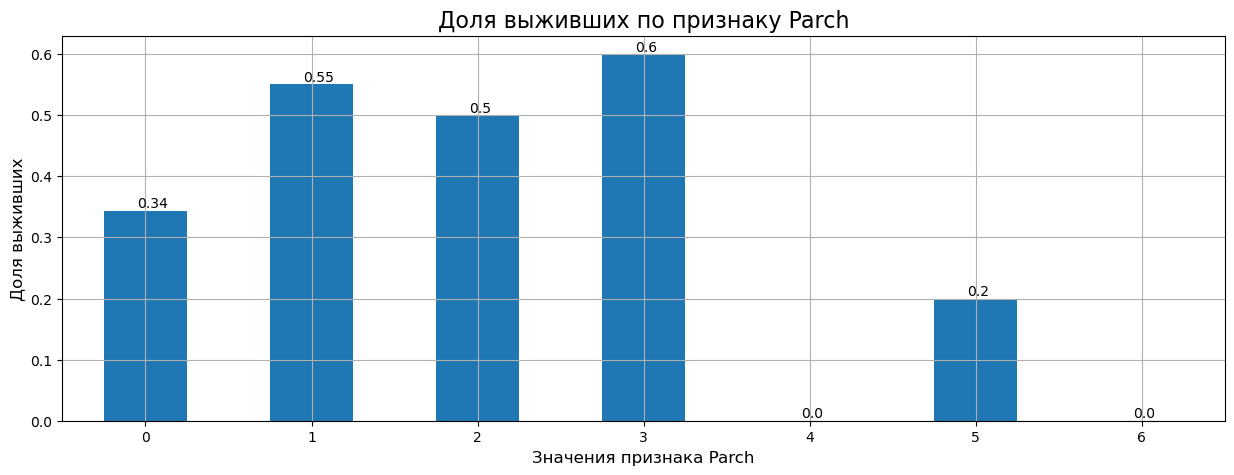

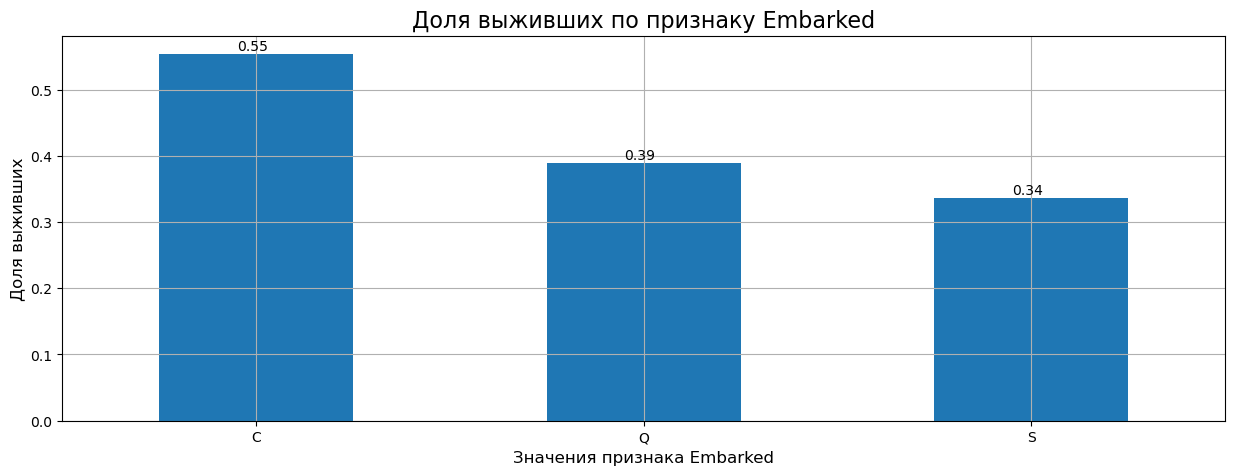

In [18]:
# попробуем увидеть зависимости целевого признака от остальных признаков и остальных признаков между собой, 
# чтобы избежать мультиколлинеарности

columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

**Исследование пропущенных значений**

In [19]:
# Используем метод .info(), чтобы увидеть больше информацию о типах данных/структуре в тренировочной выборке
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
# число пропущенных значений по признакам
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Исследование отсутствующих значений**

<AxesSubplot:>

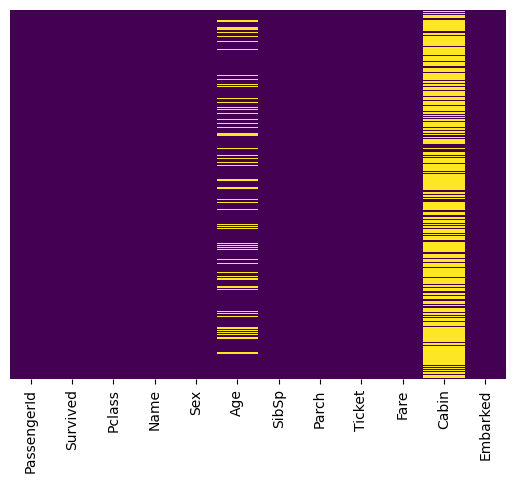

In [21]:
# тепловая карта пустых значений
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
# Слишком много незаполненных значений Cabin - удалим данный признак
training_set.drop('Cabin', axis=1, inplace=True)

In [23]:
# проверка удаления
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

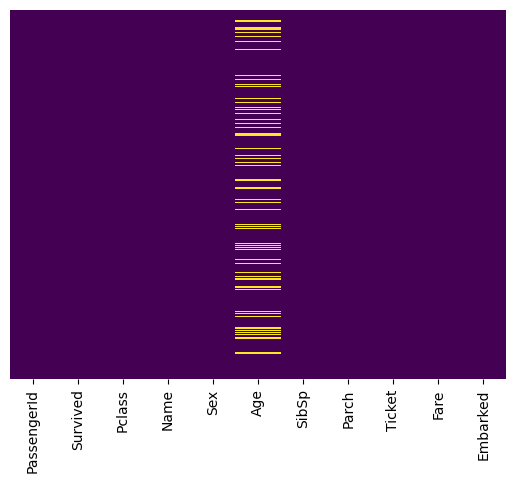

In [24]:
# тепловая карта пустых значений
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

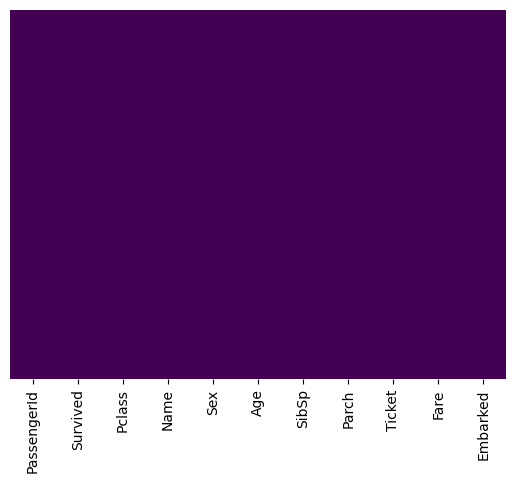

In [25]:
# удаляем пустые значения
training_set.dropna(inplace=True)
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Преобразование категориальных признаков**

In [26]:
# преобразуем бинарный класс "Пол"
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])
training_set['Sex'].unique(), np.unique(cat_enc_le)

(array(['male', 'female'], dtype=object), array([0, 1]))

In [27]:
# преобразование мультикласса
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])
# Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy
training_set.shape, cat_enc_ohe.shape

((712, 11), (712, 3))

In [28]:
# преобразование pd.get_dummies()
pd.get_dummies(training_set['Sex'], drop_first=True) # удаляем первый столбец, чтобы убить МК

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [29]:
# задаём значения Пола и Порта отправления
sex = pd.get_dummies(training_set['Sex'], drop_first=True)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [30]:
# преобразуем датасет
training_set = pd.concat([training_set, sex, embark], axis=1)
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


# Самостоятельная часть

1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.

<AxesSubplot:xlabel='Survived', ylabel='count'>

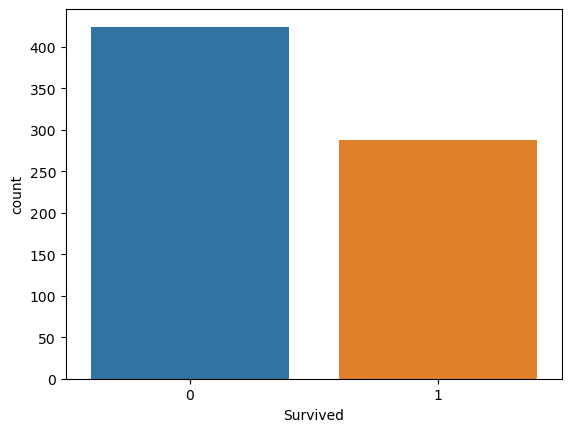

In [31]:
# проверим сбалансированность классов
sns.countplot(x = 'Survived', data = training_set)
# классы близки к сбалансированности, однако в качестве метрики всё равно использую f1_score

In [32]:
# делим выборку на целевую переменную и признаки
y = training_set['Survived'].to_numpy()
X = training_set.drop(['Survived'], axis = 1)

In [33]:
# задам модель логистической регрессии
model = LogisticRegression(max_iter = 1000)

In [34]:
# выведу метрику по кросс-валидации
skf = StratifiedKFold(n_splits = 50, shuffle = True)
cv_results = cross_val_score(model, X, y, cv = skf, scoring = 'f1')
round(cv_results.mean(), 5)

0.73054

In [35]:
# обучение на всём датасете
model.fit(X, y)
y_pred = model.predict(X)
round(f1_score(y_pred, y), 5)

0.74545

**2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:**

In [36]:
# повторно считаем данные, так как требуется исходный набор данных
training_set = pd.read_csv('titanic.csv')
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [37]:
# доля выживших пассажиров
training_set['Survived'].sum() / training_set['Survived'].count()

0.3838383838383838

In [38]:
# доли выживших женщин и мужчин
training_set.pivot_table(index = 'Sex', values = 'Survived', aggfunc = 'mean')

,Survived
Sex,
female,0.742038
male,0.188908


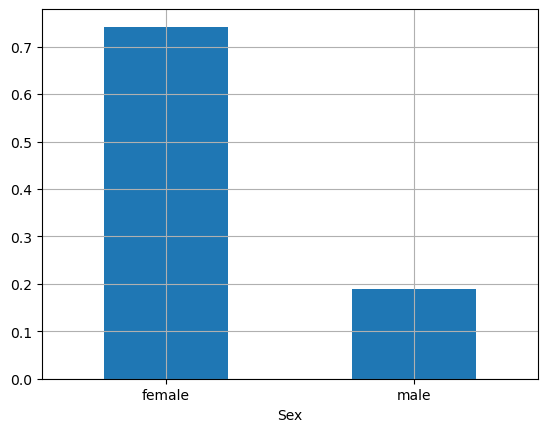

In [39]:
# визуализация распределения
pivot = training_set.pivot_table(index = 'Sex', values = 'Survived', aggfunc = 'mean')
pivot.plot(kind='bar', rot=0, grid=True, legend=False)
plt.show()

4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [40]:
# число пассажиров по классам
training_set.pivot_table(index = 'Pclass', values = 'PassengerId', aggfunc = 'count')

,PassengerId
Pclass,
1,216
2,184
3,491


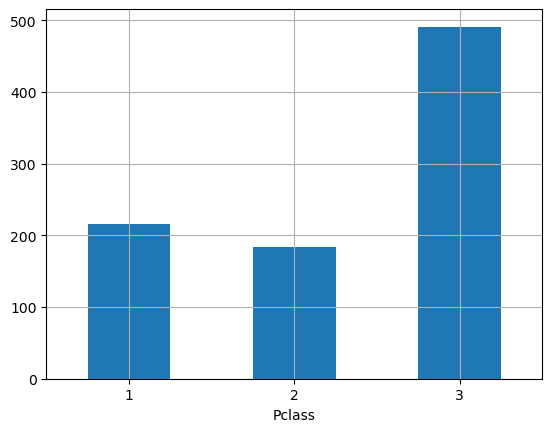

In [41]:
# визуализация распределения
pivot = training_set.pivot_table(index = 'Pclass', values = 'PassengerId', aggfunc = 'count')
pivot.plot(kind='bar', rot=0, grid=True, legend=False)
plt.show()

In [42]:
# число мужчин и женщин в третьем классе. Мужчин больше
training_set[training_set['Pclass'] == 3].pivot_table(index = 'Sex', values = 'PassengerId', aggfunc = 'count')

,PassengerId
Sex,
female,144
male,347


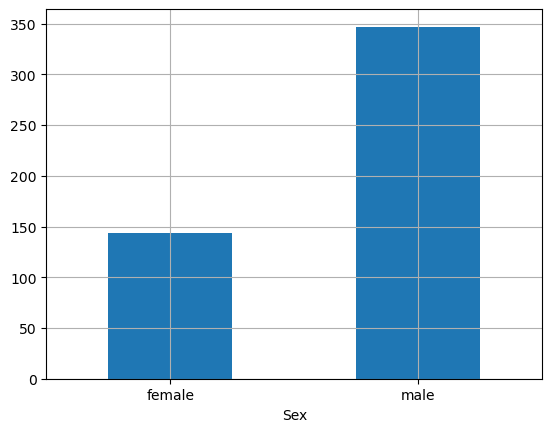

In [43]:
# визуализация распределения
pivot = training_set[training_set['Pclass'] == 3].pivot_table(index = 'Sex', values = 'PassengerId', aggfunc = 'count')
pivot.plot(kind='bar', rot=0, grid=True, legend=False)
plt.show()

5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

**Сводка по признакам из методички**

PassengerId: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как идентификатор строки и, что логично, идентификатор пассажира (т.к. для каждого пассажира в датасете представлена только одна строка).

Survived: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.

Pclass: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.

Name: Имя пассажира. Имя также может содержать титулы и обращения. "Mr" для мужчин. "Mrs" для женщин. "Miss" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "Master" для юношей.

Sex: Пол пассажира. Либо мужчины (=Male) либо женщины (=Female).

Age: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записан в датасет.

SibSp: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.

Parch: Количество родителей детей (Number of parents of children travelling with each passenger).

Ticket: Номер билета.

Fare: Сумма, которую заплатил пассажир за путешествие.

Cabin: Номер каюты пассажира. "NaN" значения в этой колонке указывает на то, что номер каюты данного пассажира не был записан.

Embarked: Порт отправления данного пассажира.

In [44]:
# PassengerId - просто айдишник пассажира. Никак не влияет на то, выжил он или нет

# Name - имя пассажира также не влияет на выживаемость

# Ticket - из номера билета, впринципе, можно вычленить полезную информацию, однако имеется достаточное кол-во
# иных признаков, которые могли бы следовать из билета: Класс пассажира, номер каюты и тыпы

# Cabin - номер каюты сам по себе обладает полезной информацией, например можно понять класс пассажира,
# но это всё у нас итак есть (ситуация схожа с номером билета) + много "Нанов"

# Билеты и Каюты почти всегда уникальные значения

training_set = training_set.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

In [45]:
# корреляционная матрица признаков Возраст и Цена билета
training_set[['Age', 'Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


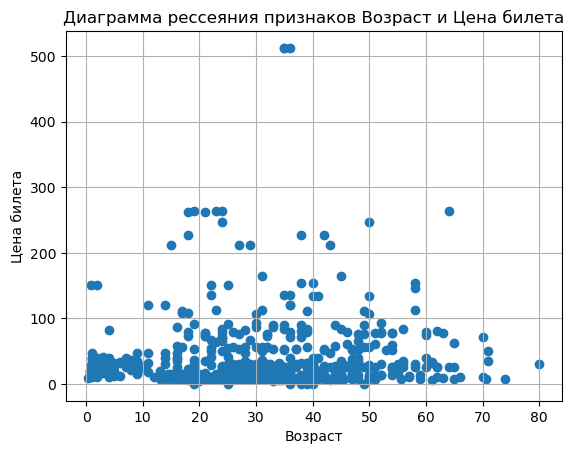

In [46]:
# убедились в отсутствии корреляции
plt.grid(True)
plt.title('Диаграмма рессеяния признаков Возраст и Цена билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.scatter(training_set['Age'], training_set['Fare'])
plt.show()

7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [47]:
# будем считать цену медианного билета как границу между "обычными" и "более дорогими билетами"
med = np.median(np.unique(training_set['Fare']))
med

21.0375

In [48]:
# доля выживших среди "обычных билетов"
training_set[training_set['Fare'] <= med]['Survived'].mean()

0.2811320754716981

In [49]:
# доля выживших среди "дорогих билетов"
training_set[training_set['Fare'] > med]['Survived'].mean() # действительно - чаще выживали "богачи"

0.5346260387811634

In [50]:
# доли выживших по классам - чем "лучше" класс, тем выше выживаемость
training_set.pivot_table(index = 'Pclass', values = 'Survived', aggfunc = 'mean')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


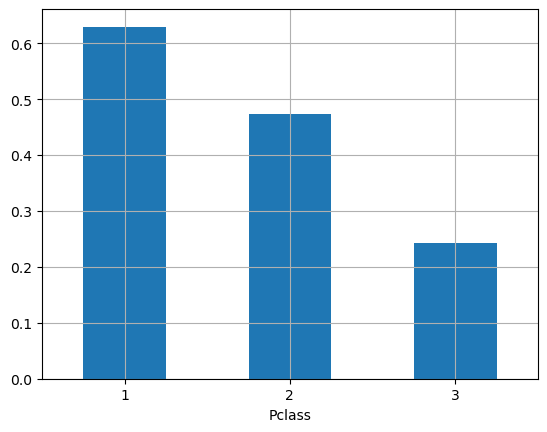

In [51]:
# визуализация распределения
pivot = training_set.pivot_table(index = 'Pclass', values = 'Survived', aggfunc = 'mean')
pivot.plot(kind='bar', rot=0, grid=True, legend=False)
plt.show()

8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [52]:
# связь между стоимостью билета и портом отправления - чем позже сел пассажир, тем меньше заплатил
# (путь соледования Саутгемптон - Шербур - Квинстаун)
training_set.pivot_table(index = 'Embarked', values = 'Fare', aggfunc = 'median')

,Fare
Embarked,
C,29.70
Q,7.75
S,13.00


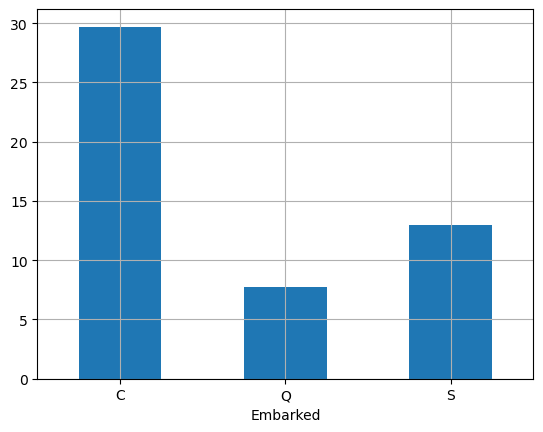

In [53]:
# визуализация распределения
pivot = training_set.pivot_table(index = 'Embarked', values = 'Fare', aggfunc = 'median')
pivot.plot(kind='bar', rot=0, grid=True, legend=False)
plt.show()

In [54]:
# минимальная, средняя и максимальная цены оплаты билета
training_set['Fare'].min(), training_set['Fare'].mean(), training_set['Fare'].max()

(0.0, 32.204207968574636, 512.3292)

In [55]:
# минимум, среднее и максимум для Саутгемптона
training_set[training_set['Embarked'] == 'C'].pivot_table(index = 'Embarked', values = 'Fare', 
                                                          aggfunc = ['min', 'mean', 'max'])

,min,mean,max
,Fare,Fare,Fare
Embarked,,,
C,4.0125,59.954144,512.3292


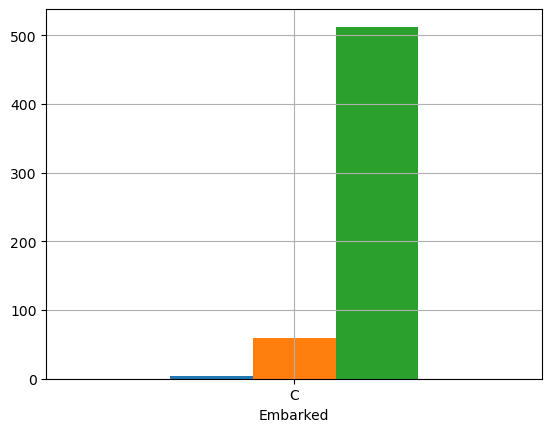

In [56]:
# визуализация распределения
pivot = training_set[training_set['Embarked'] == 'C'].pivot_table(index = 'Embarked', values = 'Fare',
                                                                  aggfunc = ['min', 'mean', 'max'])
pivot.plot(kind='bar', rot=0, grid=True, legend=False)
plt.show()

9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

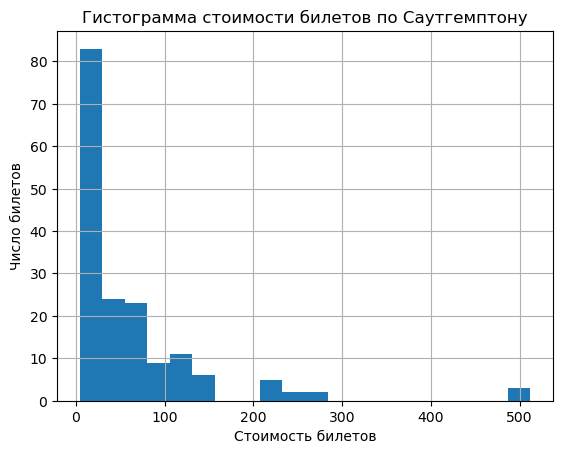

In [57]:
plt.grid(True)
plt.title('Гистограмма стоимости билетов по Саутгемптону')
plt.ylabel('Число билетов')
plt.xlabel('Стоимость билетов')
plt.hist(training_set[training_set['Embarked'] == 'C']['Fare'], 20)
plt.show()

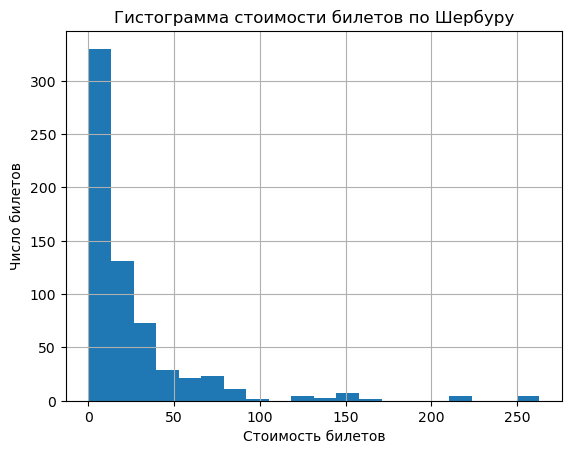

In [58]:
plt.grid(True)
plt.title('Гистограмма стоимости билетов по Шербуру')
plt.ylabel('Число билетов')
plt.xlabel('Стоимость билетов')
plt.hist(training_set[training_set['Embarked'] == 'S']['Fare'], 20)
plt.show()

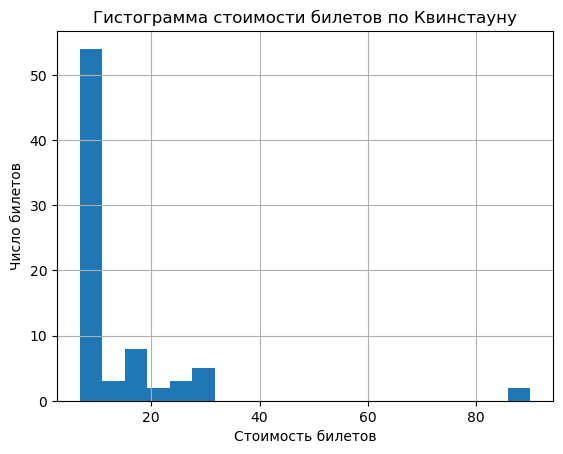

In [59]:
plt.grid(True)
plt.title('Гистограмма стоимости билетов по Квинстауну')
plt.ylabel('Число билетов')
plt.xlabel('Стоимость билетов')
plt.hist(training_set[training_set['Embarked'] == 'Q']['Fare'], 20)
plt.show()

10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [60]:
# число пассажиров и выживших пассажиров в выборке
training_set.shape[0], training_set['Survived'].sum()

(891, 342)

In [61]:
# согласно данным Министерства торговли Великобритании на борту титаника было:
# 1316 пассажиров всего, из них 818 человек погибли (ЭКИПАЖ НЕ УЧИТЫВАЛ)
891/1316, (891-342)/818 # в подвыборке представлено две трети пассажиров с сохранением пропорций - выборка репрезентативна

(0.6770516717325228, 0.6711491442542787)

11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

In [62]:
# удаляем пропуски
training_set = training_set.dropna()
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [63]:
# число пассажиров и выживших пассажиров в выборке
training_set.shape[0], training_set['Survived'].sum()

(712, 288)

In [64]:
712/1316, (712-288)/818 # пропорции сохранены - выборка репрезентативна

(0.541033434650456, 0.5183374083129584)

In [65]:
# задаём значения Пола и Порта отправления
sex = pd.get_dummies(training_set['Sex'], drop_first=True)
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)
training_set = pd.concat([training_set, sex, embark], axis=1)
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,False,True,False
886,0,2,male,27.0,0,0,13.0000,S,True,False,True
887,1,1,female,19.0,0,0,30.0000,S,False,False,True
889,1,1,male,26.0,0,0,30.0000,C,True,False,False


In [66]:
# избавляем датасет от текстовых значений
training_set = training_set.drop(['Sex', 'Embarked'], axis=1)
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,True,False
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [67]:
# разобьём данные на обучающую и тестовую выборки, обязуем Питон представить в тесте оба класса по 10%
X, y = training_set.iloc[:, 1:].to_numpy(), training_set['Survived'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = y)

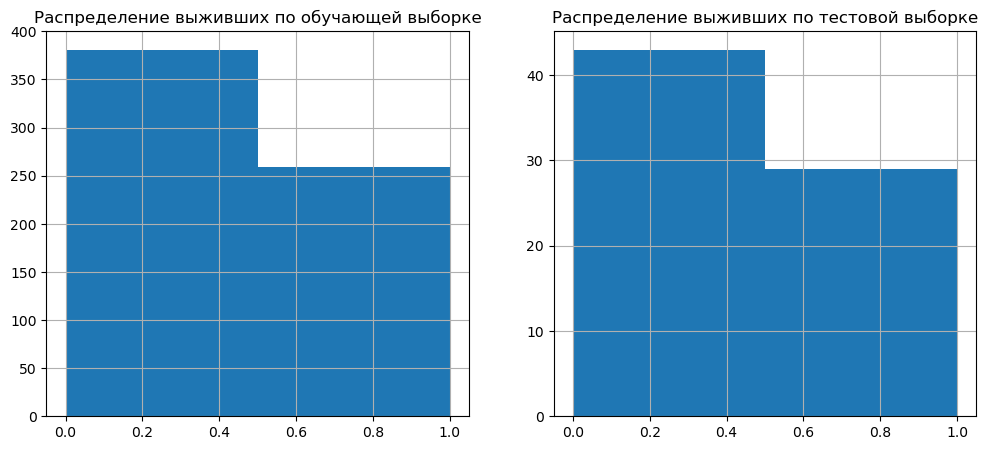

In [68]:
# выжившие по выборкам
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

ax[0].grid(True)
ax[0].set_title('Распределение выживших по обучающей выборке')
ax[0].hist(y_train, 2)

ax[1].grid(True)
ax[1].set_title('Распределение выживших по тестовой выборке')
ax[1].hist(y_test, 2)

plt.show() # однородное распределение - Питон выполнил приказ

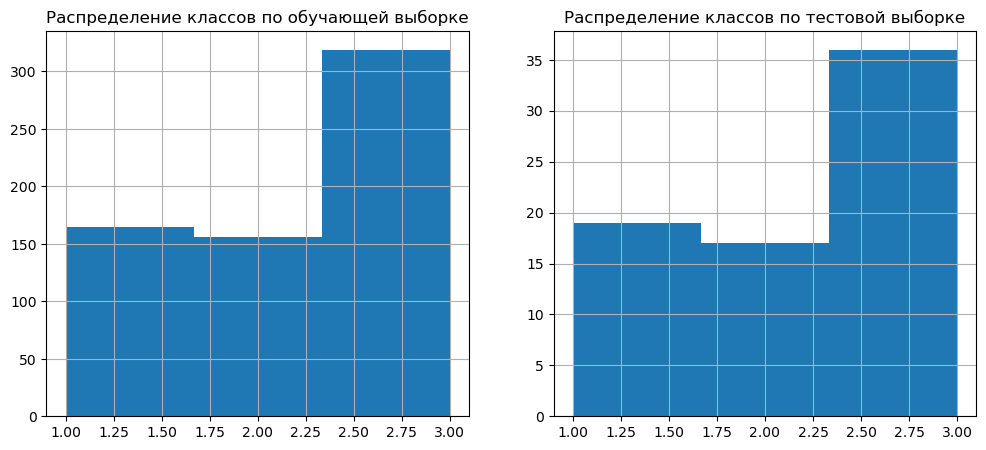

In [69]:
# возраст по классам
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

ax[0].grid(True)
ax[0].set_title('Распределение классов по обучающей выборке')
ax[0].hist(X_train[:, 0:1], 3)

ax[1].grid(True)
ax[1].set_title('Распределение классов по тестовой выборке')
ax[1].hist(X_test[:, 0:1], 3)

plt.show() # распределение близко к однородному 

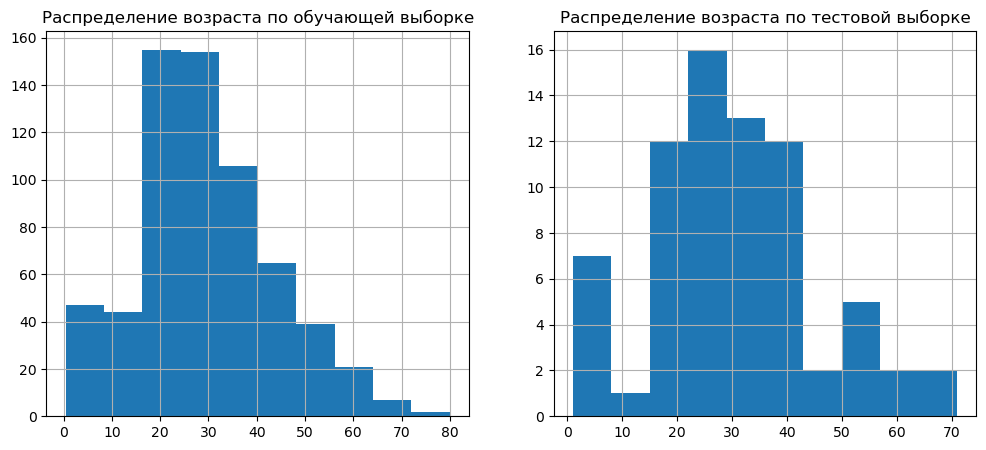

In [70]:
# возраст по выборкам
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

ax[0].grid(True)
ax[0].set_title('Распределение возраста по обучающей выборке')
ax[0].hist(X_train[:, 1:2], 10)

ax[1].grid(True)
ax[1].set_title('Распределение возраста по тестовой выборке')
ax[1].hist(X_test[:, 1:2], 10)

plt.show() # распределение не однородно

**12. Сбалансируйте классы в исходном датасете двумя способами:**

In [71]:
# количество выживших и нет (по обучающей выборке - тестовую трогать не будем)
sum(y_train), len(y_train) - sum(y_train)

(259, 381)

13. Удалите лишние объекты мажоритарного класса (выбранные случайно)

In [72]:
# копируем данные для спокойного удаления "мажоров"
y_train_maj = y_train.copy()
X_train_maj = X_train.copy()

In [73]:
c = 0
while (len(y_train_maj) - sum(y_train_maj)) != sum(y_train_maj):
    i = randint(0, len(y_train_maj) - c)
    if y_train_maj[i] == 0:
        y_train_maj = np.delete(y_train_maj, i)
        X_train_maj = np.delete(X_train_maj, i, axis = 0)
        c += 1
sum(y_train_maj), len(y_train_maj) - sum(y_train_maj)

(259, 259)

14. Добавьте в выборку дубликаты миноритарного класса.

In [74]:
# копируем данные для спокойного добавления "миноров"
y_train_min = y_train.copy()
X_train_min = X_train.copy()

In [75]:
c = 0
while (len(y_train_min) - sum(y_train_min)) != sum(y_train_min):
    i = randint(0, len(y_train_min) - c)
    if y_train_min[i] == 1:
        y_train_min = np.append(y_train_min, y_train_min[i])
        X_train_min = np.concatenate([X_train_min, [X_train_min[i]]])
        c += 1
sum(y_train_min), len(y_train_min) - sum(y_train_min)

(381, 381)

15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [76]:
# обучение и метрика на "простом" датасете
model = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
round(f1_score(y_pred, y_test), 5)

0.71698

In [77]:
# обучение и метрика на "мажоритарном" датасете
model = LogisticRegression(max_iter = 1000).fit(X_train_maj, y_train_maj)
y_pred = model.predict(X_test)
round(f1_score(y_pred, y_test), 5)

0.75862

In [78]:
# обучение и метрика на "миноритарном" датасете
model = LogisticRegression(max_iter = 1000).fit(X_train_min, y_train_min)
y_pred = model.predict(X_test)
round(f1_score(y_pred, y_test), 5)

0.77966

16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

In [79]:
# корреляционная матрица при "мажоритарном" преобразовании
table_major = pd.DataFrame(X_train_maj, columns = training_set.columns.drop(['Survived']))
table_major.corr()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Pclass,1.000000,-0.350800,0.077899,0.057562,-0.539387,0.169995,0.120946,0.212287
Age,-0.350800,1.000000,-0.319810,-0.212510,0.089104,0.061740,-0.031439,-0.018945
SibSp,0.077899,-0.319810,1.000000,0.383393,0.128703,-0.069622,0.033498,0.027449
Parch,0.057562,-0.212510,0.383393,1.000000,0.160865,-0.221882,-0.053637,0.071996
Fare,-0.539387,0.089104,0.128703,0.160865,1.000000,-0.188025,-0.056959,-0.252814
male,0.169995,0.061740,-0.069622,-0.221882,-0.188025,1.000000,-0.048686,0.127294
Q,0.120946,-0.031439,0.033498,-0.053637,-0.056959,-0.048686,1.000000,-0.334664
S,0.212287,-0.018945,0.027449,0.071996,-0.252814,0.127294,-0.334664,1.000000


In [80]:
# корреляционная матрица при "миноритарном" преобразовании
table_minor = pd.DataFrame(X_train_min, columns = training_set.columns.drop(['Survived']))
table_minor.corr()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Pclass,1.000000,-0.367499,0.063987,0.029827,-0.543258,0.164561,0.143542,0.211428
Age,-0.367499,1.000000,-0.315782,-0.197861,0.105535,0.080178,-0.042297,-0.005464
SibSp,0.063987,-0.315782,1.000000,0.395503,0.118720,-0.077545,0.044503,0.015043
Parch,0.029827,-0.197861,0.395503,1.000000,0.190419,-0.241624,-0.056965,0.061847
Fare,-0.543258,0.105535,0.118720,0.190419,1.000000,-0.177039,-0.071110,-0.234897
male,0.164561,0.080178,-0.077545,-0.241624,-0.177039,1.000000,-0.014630,0.124848
Q,0.143542,-0.042297,0.044503,-0.056965,-0.071110,-0.014630,1.000000,-0.343913
S,0.211428,-0.005464,0.015043,0.061847,-0.234897,0.124848,-0.343913,1.000000


**Отметим связь класса пассажира и стоимости билета - действительно: чем престижней класс, тем дороже билет**

*Также достойны внимания связи Возраст - Число братьев/сестёр/супругов и* <br>
*Число братьев/сестёр/супругов - Количество родителей детей. Впринципе это соответствует логике*

Отдельно стоит отметить связь Возраст - класс пассажира. Это также согласуется с логикой <br>
(Чем моложе пассажир, тем меньше у него средств - к примеру)

17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

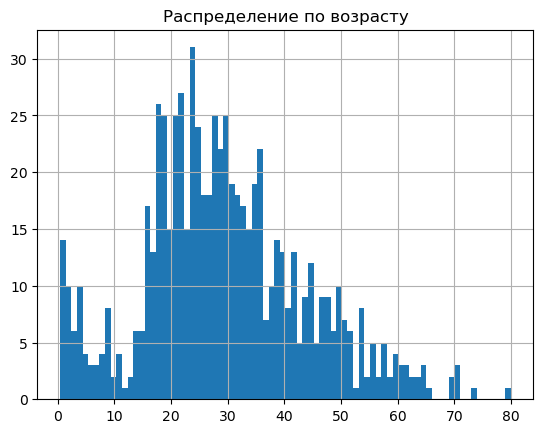

In [81]:
# гистограмма возраста
plt.grid(True)
plt.title('Распределение по возрасту')
plt.hist(training_set['Age'], 80)
plt.show() # пусть "ребёнок" будет до 12 лет, "взрослый" - до 50 лет, "старик" - после 50 лет

In [82]:
# добавляем столбец групп возраста
groups = []
for i in range(len(training_set)):
    if training_set['Age'].iloc[i] <= 12:
        groups.append('child')
    elif training_set['Age'].iloc[i] <= 50:
        groups.append('adult')
    else:
        groups.append('old')
training_set['Age_group'] = groups
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Age_group
0,0,3,22.0,1,0,7.2500,True,False,True,adult
1,1,1,38.0,1,0,71.2833,False,False,False,adult
2,1,3,26.0,0,0,7.9250,False,False,True,adult
3,1,1,35.0,1,0,53.1000,False,False,True,adult
4,0,3,35.0,0,0,8.0500,True,False,True,adult
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,True,False,adult
886,0,2,27.0,0,0,13.0000,True,False,True,adult
887,1,1,19.0,0,0,30.0000,False,False,True,adult
889,1,1,26.0,0,0,30.0000,True,False,False,adult


In [83]:
# задаём значения групп возраста
ag = pd.get_dummies(training_set['Age_group'], drop_first=True)
ag

,child,old
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
885,False,False
886,False,False
887,False,False
889,False,False


In [84]:
# преобразуем таблицу для дальнейших действий
training_set = pd.concat([training_set, ag], axis=1)
training_set = training_set.drop(['Age_group'], axis=1)
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,child,old
0,0,3,22.0,1,0,7.2500,True,False,True,False,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,False
3,1,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,True,False,False,False
886,0,2,27.0,0,0,13.0000,True,False,True,False,False
887,1,1,19.0,0,0,30.0000,False,False,True,False,False
889,1,1,26.0,0,0,30.0000,True,False,False,False,False


In [85]:
# делим выборку на целевую переменную и признаки
y = training_set['Survived'].to_numpy()
X = training_set.drop(['Survived'], axis = 1)

In [86]:
# задам модель логистической регрессии
model = LogisticRegression(max_iter = 1000)

In [87]:
# выведу метрику по кросс-валидации
skf = StratifiedKFold(n_splits = 50, shuffle = True)
cv_results = cross_val_score(model, X, y, cv = skf, scoring = 'f1')
round(cv_results.mean(), 5)

0.74709

In [88]:
# обучение на всём датасете
model.fit(X, y)
y_pred = model.predict(X)
round(f1_score(y_pred, y), 5)

0.75801

**Как итог деление на возрастные группы дало сильный прирост метрики**

In [89]:
# также попробуем без столбца Возраста впринципе
y = training_set['Survived'].to_numpy()
X = training_set.drop(['Survived', 'Age'], axis = 1)
model = LogisticRegression(max_iter = 1000)

In [90]:
skf = StratifiedKFold(n_splits = 50, shuffle = True)
cv_results = cross_val_score(model, X, y, cv = skf, scoring = 'f1')
round(cv_results.mean(), 5)

0.72686

In [91]:
model.fit(X, y)
y_pred = model.predict(X)
round(f1_score(y_pred, y), 5) # метрика лучше, чем с возрастом, но без возрастной группы

0.74729